In [7]:
# import required packages

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from collections import deque
#from multiprocessing import deque

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from numpy import savetxt
import pickle
# YOUR IMPLEMENTATION
# Thoroughly comment your code to make it easy to follow


if __name__ == "__main__": 
    
    
    # 1. load your training data
    
    #Commented code to create the dataset by using the latest 3 days as
    #the features and the next day’s opening price as the target
    
    ##And the saving the dataset into train and test.csv files
    
    '''
    df = pd.read_csv('.\data\q2_dataset.csv' ,sep=r'\s*,\s*', header=0, encoding='ascii', engine='python')
    df = df[::-1].reset_index(drop=True)
    
    data = df.iloc[:,1:]
    data['target'] = data['Open'].shift(-1)
    
    feature_columns = ['Volume', 'Open', 'High', 'Low']
    
    data.dropna(inplace=True)
    
    #Preparing data
    sequence_data = []
    sequences = deque(maxlen = 3)
    for entry, target in zip(data[feature_columns].values, data['target'].values):
        sequences.append(entry)
        if len(sequences) == 3:
            sequence_data.append([np.array(sequences), target])
            
    X, y = [], []
    for seq, tar in sequence_data:
        X.append(seq)
        y.append(tar)
        
    X = np.array(X)
    y = np.array(y)
    
    
    X=X.reshape(1256,12)
    y = y.reshape(1256,1)
    
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    
    train_data_RNN = np.concatenate((X_train, y_train), axis=1)
    test_data_RNN = np.concatenate((X_test, y_test), axis=1)

    
    savetxt('./data/train_data_RNN.csv', train_data_RNN, delimiter=',')
    savetxt('./data/test_data_RNN.csv', test_data_RNN, delimiter=',')
    
    
    
    
    '''
    
    #Loading the train data
    
    df = np.genfromtxt('./data/train_data_RNN.csv',delimiter=',')
    y_train = df[:, -1].reshape(879,1)
    X_train =  df[:, :-1]
    
    scaler = preprocessing.MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    
    X_train = X_train.reshape(879, 4, 3)
    
    
    model = Sequential()

    model.add(Bidirectional(LSTM(256, return_sequences=True), input_shape=(None, 3)))
    model.add(Dropout(0.4))

    model.add(LSTM(128))

    model.add(Dropout(0.4))

    model.add(Dense(1, activation="linear"))
    model.compile(loss="mean_absolute_error", optimizer='adam')

    print(model.summary())
    

   
    

    # 2. Train your network
    #  Make sure to print your training loss and accuracy within training to show progress
    # Make sure you print the final training accuracy
    
    batch_size = 32
    epochs = 1
    training = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)


    # 3. Save your model
    
    
    #with open('modelq22.pickle', 'wb') as f:
     #   pickle.dump(model, f)
        
    model.save('./models/20848769_RNN_model.h5')

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_4 (Bidirection (None, None, 512)         532480    
_________________________________________________________________
dropout_8 (Dropout)          (None, None, 512)         0         
_________________________________________________________________
lstm_9 (LSTM)                (None, 128)               328192    
_________________________________________________________________
dropout_9 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 129       
Total params: 860,801
Trainable params: 860,801
Non-trainable params: 0
_________________________________________________________________
None
Train on 791 samples, validate on 88 samples
791/791 [==============================] - 3s 4ms/sample - loss:

Loss = 2.5109484088199525


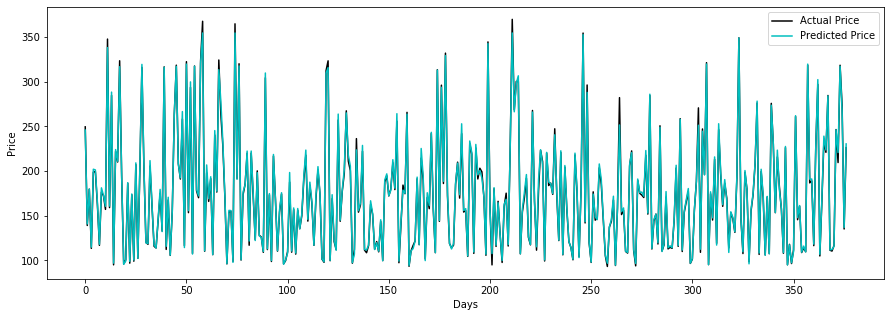

In [22]:
# import required packages
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from collections import deque
#from multiprocessing import deque

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from numpy import savetxt
import pickle
from tensorflow import keras

# YOUR IMPLEMENTATION
# Thoroughly comment your code to make it easy to follow


if __name__ == "__main__":
    
    # 1. Load your saved model
    
    model = keras.models.load_model('./models/20848769_RNN_model.h5')
    
    
    # 2. Load your testing data
    
    df = np.genfromtxt('./data/test_data_RNN.csv',delimiter=',')
    y_test = df[:, -1].reshape(377,1)
    X_test =  df[:, :-1]
    
     # 3. Run prediction on the test data and output required plot and loss
    
    scaler = preprocessing.MinMaxScaler()
    X_test = scaler.fit_transform(X_test)
    
    X_test = X_test.reshape(377, 4, 3)
    
    
    mae = model.evaluate(X_test, y_test, verbose=0)
    print("Loss =", mae)
    
    y_pred = model.predict(X_test)
    
    plt.figure(figsize = (15,5))
    plt.plot(y_test, c='k')
    plt.plot(y_pred, c='c')
    plt.xlabel("Days")
    plt.ylabel("Price")
    plt.legend(["Actual Price", "Predicted Price"])
    plt.show()

    
    
    
   

In [24]:
# import required packages
import keras
from keras.models import Model, Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence


import os
import glob
from pathlib import Path #For windows glob
from sklearn.utils import shuffle
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import *
import re
import numpy as np
from string import punctuation
import pickle

from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.layers import Dense , Input , LSTM , Embedding, Dropout , Activation, GRU, Flatten

# YOUR IMPLEMENTATION
# Thoroughly comment your code to make it easy to follow


if __name__ == "__main__": 
    
    
    def read_data():
    
        #Creating a dictionary with key elements as train and test
        #The key elements will have value as lists
        data = {}
        labels = {}

        for data_type in ['train', 'test']:
            data[data_type] = {}
            labels[data_type] = {} 


            for sentiment in ['pos', 'neg']:
                data[data_type][sentiment] = []
                labels[data_type][sentiment] = []

                path = data_type + '\\' + sentiment
                glob_path = Path(r".\data\aclImdb\\" + path)

                #Opening .txt files that are reviews
                files = [str(pp) for pp in glob_path.glob("**/*.txt")]

                #path = directory +'\\' + data_type + '\\' + sentiment #+ '**/*.txt'
                #files = glob.glob(path)
                #print(len(files))

                for f in files:
                    with open(f,encoding="cp437") as review:
                       # print(review)
                        data[data_type][sentiment].append(review.read())
                        # a positive review is represented by 1 and a negative review is represented by '0'
                        labels[data_type][sentiment].append(1 if sentiment == 'pos' else 0)


        return data, labels
    
    
    def prepare_imdb_data(data, labels):
    
        #Combining the positive and negative reviews and labels
        X_train = data['train']['pos'] + data['train']['neg']
        X_test = data['test']['pos'] + data['test']['neg']
        y_train = labels['train']['pos'] + labels['train']['neg']
        y_test = labels['test']['pos'] + labels['test']['neg']

        #Shuffling reviews and their corresponding labels
        X_train, y_train = shuffle(X_train, y_train)
        X_test, y_test = shuffle(X_test, y_test)

        # Return a unified training data, test data, training labels, test labels
        return X_train, X_test, y_train, y_test
    
    
    
    def review_to_words(review):
        nltk.download("stopwords", quiet=True)
        stemmer = PorterStemmer()

        ##Removing HTML tags
        clean = re.compile('<.*?>')
        text = re.sub(clean, '', review)

        ##Converting the text to lower case
        text = re.sub(r"[^a-zA-Z0-9]", " ", text.lower())

        ##Removing punctuation
        text = ''.join([c for c in text if c not in punctuation])

        ## Split text into individual words
        words = text.split()

        ##Removing stopwords like is, the
        words = [w for w in words if w not in stopwords.words("english")]

        ##Stemming
        words = [PorterStemmer().stem(w) for w in words] 

        return words
    
    
    cache_dir = os.path.join("../cache", "sentiment_analysis") 
    os.makedirs(cache_dir, exist_ok=True) 

    def preprocess_data(data_train, data_test, labels_train, labels_test,
                        cache_dir=cache_dir, cache_file="preprocessed_data.pkl"):

        # If cache_file is not None, trying to read from it first
        cache_data = None
        if cache_file is not None:
            try:
                with open(os.path.join(cache_dir, cache_file), "rb") as f:
                    cache_data = pickle.load(f)
                print("Read preprocessed data from cache file:", cache_file)
            except:
                pass 

        # If cache is missing
        if cache_data is None:
            # Preprocess training and test data to obtain words for each review

            words_train = [review_to_words(review) for review in data_train]
            words_test = [review_to_words(review) for review in data_test]

            # Writing to cache file for future runs
            if cache_file is not None:
                cache_data = dict(words_train=words_train, words_test=words_test,
                                  labels_train=labels_train, labels_test=labels_test)
                with open(os.path.join(cache_dir, cache_file), "wb") as f:
                    pickle.dump(cache_data, f)
                print("Wrote preprocessed data to cache file:", cache_file)


        else:
            # Unpacking data loaded from cache file
            words_train, words_test, labels_train, labels_test = (cache_data['words_train'],
                    cache_data['words_test'], cache_data['labels_train'], cache_data['labels_test'])

        return words_train, words_test, labels_train, labels_test
    
    
    
    def build_dict(data, vocab_size = 5500):
    
        #dictionary to store the words in reviews along with how often they occur
        word_count = {}

        for review in data:
            for word in review:
                if (word in word_count):
                    word_count[word] +=1
                else:
                    word_count[word] =1


        sorted_words = [item[0] for item in sorted(word_count.items(), key=lambda l: l[1], reverse=True)]


        #Dictionary that will keeps the tract of words into integers
        word_dict = {}

        for idx, word in enumerate(sorted_words[:vocab_size - 2]): # The -2 is for the 'no word'
            word_dict[word] = idx + 2                              

        return word_dict
    
    
    def convert_and_pad(word_dict, sentence, pad=600):
    
        # 0 represents the 'no word' category, it is basically padding to truncate the
        #length of each input to specific size
        #Padding is carried out by zero
        NOWORD = 0 
        INFREQ = 1 # 1 represents the words not in word_dict

        #Creating a list of 600 elements, where each element is 0
        working_sentence = [NOWORD] * pad

        for word_index, word in enumerate(sentence[:pad]):
            if word in word_dict:
                working_sentence[word_index] = word_dict[word]
            else:
                working_sentence[word_index] = INFREQ

        return working_sentence, min(len(sentence), pad)

    def convert_and_pad_data(word_dict, data, pad=600):
        result = []
        lengths = []

        for sentence in data: #For each review
            converted, leng = convert_and_pad(word_dict, sentence, pad)
            result.append(converted)
            lengths.append(leng)

        return np.array(result), np.array(lengths)
    
    
    
    
    
    data, labels = read_data()
    print("IMDB reviews: train = {} pos / {} neg, test = {} pos / {} neg".format(
                len(data['train']['pos']), len(data['train']['neg']),
                len(data['test']['pos']), len(data['test']['neg'])))
    
    
    
    
    # 1. load your training data
    
    
    #Getting training and testing data
    X_train, X_test, y_train, y_test = prepare_imdb_data(data, labels)
    
    
    X_train, X_test, y_train, y_test = preprocess_data(X_train, X_test, y_train, y_test)
    word_dict = build_dict(X_train)
    
    X_train, X_train_len = convert_and_pad_data(word_dict, X_train)
    
    print(X_train.shape)
    
    model = Sequential()
    model.add(Embedding(5500, 256, input_length=600))
    #model.add(Flatten())

    model.add(Bidirectional(LSTM(128, return_sequences = True)))
    #model.add(Dropout(0.2))#
    model.add(GlobalMaxPool1D())

    model.add(Dense(64, activation="relu"))
    #model.add(Dropout(0.5))
    model.add(Dense(32, activation="relu"))#

    model.add(Dense(16, activation="relu"))
    model.add(Dropout(0.5))#
    model.add(Dense(1, activation="sigmoid"))

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    
    y_train = np.array(y_train).reshape(25000,1)
    
    batch_size = 200
    epochs = 3
    history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)
    
    
    
    print("Final training accuracy = " , history.history["accuracy"])
    
    model.save('./models/20848769_NLP_model.h5')

    #print(model.summary())

    # 2. Train your network
    #  Make sure to print your training loss and accuracy within training to show progress
    #  Make sure you print the final training accuracy
    
    #print('working')

    # 3. Save your model

IMDB reviews: train = 12500 pos / 12500 neg, test = 12500 pos / 12500 neg
Read preprocessed data from cache file: preprocessed_data.pkl
(25000, 600)
Train on 20000 samples, validate on 5000 samples
Epoch 1/3
20000/20000 [==============================] - 3019s 151ms/step - loss: 0.5643 - accuracy: 0.7031 - val_loss: 0.3812 - val_accuracy: 0.8440
Epoch 2/3
20000/20000 [==============================] - 1945s 97ms/step - loss: 0.3326 - accuracy: 0.8789 - val_loss: 0.2912 - val_accuracy: 0.8756
Epoch 3/3
20000/20000 [==============================] - 2358s 118ms/step - loss: 0.2609 - accuracy: 0.9166 - val_loss: 0.3444 - val_accuracy: 0.8688
Final training accuracy =  [0.70315, 0.87895, 0.91665]


In [14]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from keras.models import Sequential
import matplotlib.pyplot as plt
import pickle

# import required packages


# YOUR IMPLEMENTATION
# Thoroughly comment your code to make it easy to follow


if __name__ == "__main__": 
    # 1. load your training data
    
    '''
    data = pd.read_csv('.\data\q2_dataset.csv')
    
    reverse_data = pd.DataFrame(data.to_numpy().reshape(1259,6))[::-1]
    reverse_data = reverse_data.reset_index()
    del reverse_data['index']

    # 2. Train your network
    #   Make sure to print your training loss and accuracy within training to show progress
    #   Make sure you print the final training accuracy
    
    data_created = pd.DataFrame(columns= ['Day 1 Volume','Day 2 Volume','Day 3 Volume',
                                      'Day 1 Open','Day 2 Open','Day 3 Open',
                                      'Day 1 High','Day 2 High','Day 3 High',
                                      'Day 1 Low','Day 2 Low','Day 3 Low', 
                                      'Result'])
    for i,j in reverse_data.iterrows(): 
        if(i<np.shape(reverse_data)[0]-3):
            new_row = {'Day 1 Volume':reverse_data.loc[i][2],'Day 2 Volume':reverse_data.loc[i+1][2],'Day 3 Volume':reverse_data.loc[i+2][2],
                       'Day 1 Open':reverse_data.loc[i][3],'Day 2 Open':reverse_data.loc[i+1][3],'Day 3 Open':reverse_data.loc[i+2][3],
                       'Day 1 High':reverse_data.loc[i][4],'Day 2 High':reverse_data.loc[i+1][4],'Day 3 High':reverse_data.loc[i+2][4],
                       'Day 1 Low':reverse_data.loc[i][5],'Day 2 Low':reverse_data.loc[i+1][5],'Day 3 Low':reverse_data.loc[i+2][5], 
                       'Result':reverse_data.loc[i+3][3]}
            data_created = data_created.append(new_row, ignore_index=True)
            
            
    dataset = data_created.sample(frac=1).reset_index(drop=True)
    
    train_data = dataset.head((int)(0.7*(np.shape(dataset)[0])))
    test_data = dataset.tail((int)(0.3*(np.shape(dataset)[0]))+1)
    
    train_data.to_csv('./data/train_data_RNN.csv')
    test_data.to_csv('./data/test_data_RNN.csv')

    '''
    
    
    converted_data = pd.read_csv('./data/train_data_RNN.csv')
    converted_data.drop("Unnamed: 0", inplace=True, axis=1)
#converted_data
    
    
    array = converted_data.values
    # separate array into input and output components
    X = array[:,0:np.shape(converted_data)[1]-1]
    Y = array[:,np.shape(converted_data)[1]-1]
    scaler = MinMaxScaler(feature_range=(0, 1))
    X = scaler.fit_transform(X)
    pd.DataFrame(X)
    pd.DataFrame(Y)
    
    X_train = np.reshape(X, (X.shape[0],X.shape[1],1))
    
    
    model = Sequential()
    model.add(LSTM(units=300, return_sequences=True, input_shape=(X_train.shape[1],1)))
    model.add(Dropout(0.5))
    model.add(LSTM(units=150))
    model.add(Dropout(0.3))
    model.add(Dense(units=1))
    
    #print(model.summary())
    
    model.compile(optimizer='adam', loss='mean_absolute_error')
    history=model.fit(X_train, Y, epochs=1000, batch_size=32)
    
    filename = './models/20815417_RNN_model.sav'
    pickle.dump(model, open(filename, 'wb'))

    

    # 3. Save your model

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 12, 300)           362400    
_________________________________________________________________
dropout_5 (Dropout)          (None, 12, 300)           0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 150)               270600    
_________________________________________________________________
dropout_6 (Dropout)          (None, 150)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 151       
Total params: 633,151
Trainable params: 633,151
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/1
879/879 [==============================] - 2s 2ms/step - loss: 165.3722
working


Obtained Loss = 4.435832320397982


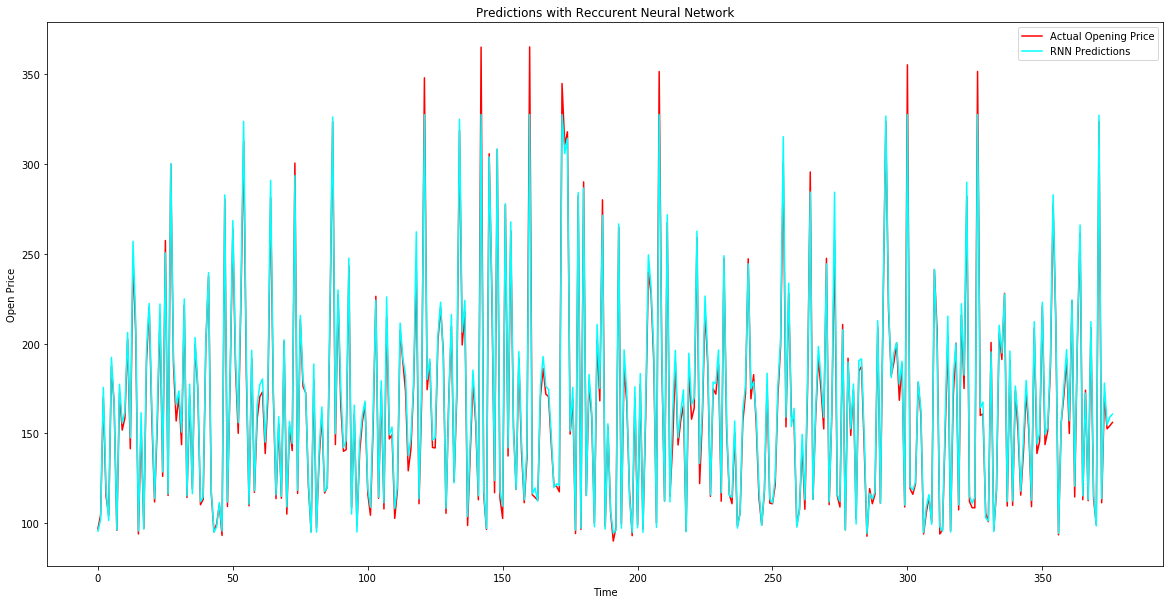

In [29]:
# import required packages

import numpy as np
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import pickle
from sklearn.metrics import mean_absolute_error


# YOUR IMPLEMENTATION
# Thoroughly comment your code to make it easy to follow


if __name__ == "__main__":
    
    
    # 1. Load your saved model

    
    loaded_model = pickle.load(open("./models/20815417_RNN_model.sav", 'rb'))
    
    
    # 2. Load your testing data

    test_data_RNN = pd.read_csv('./data/test_data_RNN.csv')
    test_data_RNN.drop("Unnamed: 0", inplace=True, axis=1)
    
    
    array = test_data_RNN.values
    # separate array into input and output components
    X_test = array[:,0:np.shape(test_data_RNN)[1]-1]
    Y_test = np.array(array[:,np.shape(test_data_RNN)[1]-1])
    scaler = MinMaxScaler(feature_range=(0, 1))
    X_test = scaler.fit_transform(X_test)
    pd.DataFrame(X_test)
    
    X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
    
    
    


    predictions = loaded_model.predict(X_test)
    mse = mean_absolute_error(Y_test, predictions)
    print("Obtained Loss =",  mse)
    
    # 3. Run prediction on the test data and output required plot and loss
    
    plt.figure(figsize=(20,10))
    plt.plot(Y_test, color='red', label='Actual Opening Price')
    plt.plot(predictions, color='aqua', label='RNN Predictions')
    plt.title('Predictions with Reccurent Neural Network')
    plt.xlabel('Time')
    plt.ylabel('Open Price')
    plt.legend()
    plt.show()
    
   

In [28]:
X_test.shape

(377, 12, 1)

In [6]:
# import required packages
# Importing Libraries
import pandas as pd
import numpy as np
from nltk.stem import PorterStemmer
from tensorflow.keras.layers import Flatten, GlobalMaxPooling1D, Embedding, LSTM, Dense, Dropout, Conv1D, MaxPooling1D
from os import listdir
from tensorflow.keras.preprocessing.sequence import pad_sequences
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
import tensorflow as tf
import pickle
from tensorflow.keras.models import Sequential
import re
from sklearn.utils import shuffle


# YOUR IMPLEMENTATION
# Thoroughly comment your code to make it easy to follow


if __name__ == "__main__": 
    
    # Function to remove tags from our text data
    TAG_RE = re.compile(r'<[^>]+>')

    def remove_tags(text):
        return TAG_RE.sub('', text)
    
    # This function will clean our text data. Refer to individual step for details
    def clean_file(sen):

        # Removing html tags
        sentence = remove_tags(sen)

        # Remove punctuations and numbers
        sentence = re.sub('[^a-zA-Z]', ' ', sentence)

        # Single character removal
        sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

        # Removing multiple spaces
        sentence = re.sub(r'\s+', ' ', sentence)

        # Splitting the text into tokens for further steps
        tokens = sentence.split()

        # Removing Stop words such as 'the', 'an', 'if'
        set_of_stop_words = set(stopwords.words('english'))   # remove stop words
        tokens = [word for word in tokens if not word in set_of_stop_words] 

        # To stem the words - reducing a word to its word stem 
        ps = PorterStemmer()
        tokens = [ps.stem(word) for word in tokens]

        # To remove duplicates
        tokens = list(dict.fromkeys(tokens))

        # creating the text back
        tokens = " ".join(tokens)

        return tokens
    
    
    
    
    
    # This function will load the training data
    def extract_training_data(directory):
        data = []
        for filename in listdir(directory):
            filepath = directory + filename
            file = open(filepath, 'r',  encoding="utf8")  # open the file in the read only mode
            text = file.read()                            # read the contents of the file
            file.close()                                  # close the file 
            data.append(text)
        return data
    
    
    
    # Path where files of positive training reviews exist 
    train_set_pos_path = "data/aclImdb/train/pos/"

    # Path where files of negative training reviews exist 
    train_set_neg_path = "data/aclImdb/train/neg/"

    # Extracting training data
    train_pos = extract_training_data(train_set_pos_path)
    train_neg = extract_training_data(train_set_neg_path)
    
    ytrain =[]
    for x in range(len(train_pos)):
        ytrain.append(1)
    for x in range(len(train_neg)):
        ytrain.append(0)

    ytrain=np.array(ytrain) 
    
    
    
    def clean_filter(list_temp):
        for i in range(len(list_temp)):
            list_temp[i] = clean_file(list_temp[i])        
        return list_temp     
    
    
    # Cleaning the data as per defined steps above
    train_pos_filtered = clean_filter(train_pos)
    train_neg_filtered = clean_filter(train_neg)

    # Total training data
    train_reviews = train_pos_filtered + train_neg_filtered
    
    
    # This function will use TF-IDF Vectorization to convert our text data to a form which will be fed to the model.
    def encode_data(train_reviews):   
        NGRAM_RANGE = (1, 2)
        TOKEN_MODE = 'word'
        MIN_DOC_FREQ = 2
        MAX_FEATURES = 20000

        kwargs = {
            'ngram_range' : NGRAM_RANGE,
            'dtype' : 'float32',
            'strip_accents' : 'unicode',
            'decode_error' : 'replace',
            'analyzer' : TOKEN_MODE,
            'min_df' : MIN_DOC_FREQ,
            'max_features' :MAX_FEATURES
        }

        # Learn Vocab from train texts and vectorize train and test sets
        tfidf_vectorizer = TfidfVectorizer(**kwargs)

        xtrain_tfidf_temp = tfidf_vectorizer.fit_transform(train_reviews)

        with open('tfidf_vectorizer.pickle', 'wb') as handle:
            pickle.dump(tfidf_vectorizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

        return xtrain_tfidf_temp.toarray()
    
    
    xtrain,y = shuffle(train_reviews, ytrain, random_state=42)
    X = encode_data(xtrain)
    
    
    dropout_rate = 0.5               
    input_shape = X.shape[1:]  

    model = Sequential()
    model.add(Dropout(rate=dropout_rate, input_shape=input_shape))
    model.add(Dense(units=32, activation='relu'))
    model.add(Dropout(rate=dropout_rate))
    model.add(Dense(units=1, activation='sigmoid'))

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

# Train and validate model
    history = model.fit(X, y, epochs=5,verbose=2, batch_size=128)

    print(model.summary())
    


    # 1. load your training data

    # 2. Train your network
    #   Make sure to print your training loss and accuracy within training to show progress
    #   Make sure you print the final training accuracy

    # 3. Save your model

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Gurleen\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\Gurleen\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1817: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. float32 'dtype' will be converted to np.float64.
  UserWarning)


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout (Dropout)            (None, 20000)             0         
_________________________________________________________________
dense (Dense)                (None, 32)                640032    
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 640,065
Trainable params: 640,065
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# Importing Libraries
import glob
import os
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from os import listdir
from tensorflow.keras.preprocessing.sequence import pad_sequences
import string
from tensorflow.keras.preprocessing.text import Tokenizer
import nltk
nltk.download('stopwords')
import tensorflow as tf
import re
from sklearn.utils import shuffle
import pickle


# import required packages


# YOUR IMPLEMENTATION
# Thoroughly comment your code to make it easy to follow


if __name__ == "__main__": 
    
    
    
    # Function to remove tags from our text data
    TAG_RE = re.compile(r'<[^>]+>')

    def remove_tags(text):
        return TAG_RE.sub('', text)
    
    
    # This function will clean our text data. Refer to individual step for details
    def clean_file(sen):

        # Removing html tags
        sentence = remove_tags(sen)

        # Remove punctuations and numbers
        sentence = re.sub('[^a-zA-Z]', ' ', sentence)

        # Single character removal
        sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

        # Removing multiple spaces
        sentence = re.sub(r'\s+', ' ', sentence)

        # Splitting the text into tokens for further steps
        tokens = sentence.split()

        # Removing Stop words such as 'the', 'an', 'if'
        set_of_stop_words = set(stopwords.words('english'))   # remove stop words
        tokens = [word for word in tokens if not word in set_of_stop_words] 

        # To stem the words - reducing a word to its word stem 
        ps = PorterStemmer()
        tokens = [ps.stem(word) for word in tokens]

        # To remove duplicates
        tokens = list(dict.fromkeys(tokens))

        # creating the text back
        tokens = " ".join(tokens)

        return tokens
    
    
    
    
    # This function will load the test data

    def extract_testing_data(directory):
        data = []
        for filename in listdir(directory):
            filepath = directory + filename
            file = open(filepath, 'r',  encoding="utf8")  # open the file in the read only mode
            text = file.read()          # read the contents of the file
            file.close()                # close the file 
            data.append(text)
        return data
    
    
    # Path where files of positive test reviews exist 
    test_set_pos_path = "data/aclImdb/test/pos/"

    # Path where files of negative test reviews exist 
    test_set_neg_path = "data/aclImdb/test/neg/"

    # Extracting testing data
    test_pos = extract_testing_data(test_set_pos_path)
    test_neg = extract_testing_data(test_set_neg_path)
    
    
    # Creating the Labels/Classes, where 1 - Positive and 0 - Negative
    ytest= []

    for y in range(len(test_pos)):
        ytest.append(1)
    for y in range(len(test_neg)):
        ytest.append(0)

    ytest=np.array(ytest)
    
    
    # This function will send text files one by one for cleaning
    def clean_filter(list_temp):
        for i in range(len(list_temp)):
            list_temp[i] = clean_file(list_temp[i])        
        return list_temp
    
    
    # Cleaning the data as per defined steps above
    test_pos_filtered = clean_filter(test_pos)
    test_neg_filtered = clean_filter(test_neg)

    # Total testing data
    test_reviews  = test_pos_filtered  + test_neg_filtered

    
    # Shuffling the data
    xtest,y = shuffle(test_reviews, ytest, random_state=42)
    
    # Loading the TF-IDF Vectorizer object which was used to transform the training data.
    
    with open('tfidf_vectorizer.pickle', 'rb') as handle:
        tfidf_vectorizer = pickle.load(handle)

    # Tranforming the testing data
    X = tfidf_vectorizer.transform(xtest).toarray()

    # Loading the model
    loaded_model = tf.keras.models.load_model('20815417_NLP_model_tfidf.h5')
    
    # Calucating Testing Accuracy
    loss, accuracy = loaded_model.evaluate(X,y,verbose=0)
    print('Test accuracy = ', (accuracy * 100))
    
    # 1. Load your saved model

    # 2. Load your testing data

    # 3. Run prediction on the test data and print the test accuracy